# Load dataset

In [ ]:
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz

--2021-02-27 19:30:08--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25342182 (24M) [application/x-gzip]
Saving to: ‘kinetics700_2020.tar.gz’

kinetics700_2020.ta 100%[===================>]  24.17M  49.1MB/s    in 0.5s    

2021-02-27 19:30:09 (49.1 MB/s) - ‘kinetics700_2020.tar.gz’ saved [25342182/25342182]



In [ ]:
import tarfile

tar = tarfile.open('kinetics700_2020.tar.gz', "r:gz")
tar.extractall()
tar.close()

[ERROR: IOPub data rate exceeded](https://stackoverflow.com/questions/50689784/in-google-collab-i-get-iopub-data-rate-exceeded)

[CSV](https://www.programiz.com/python-programming/reading-csv-files)

In [ ]:
import os
import csv
import numpy as np

file_path = '/content/kinetics700_2020'

data_train = []
label_train = []
data_test = []
label_test = []

fname = 'train.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0: # Ignore the header
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_train.append(dict_temp)
      label_train.append(row[0])
    
# Print the first 10 elements
print(data_train[:10])
print(label_train[:10])


# Use validation dataset as test set
fname = 'validate.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0:
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_test.append(dict_temp)
      label_test.append(row[0])

label_train = np.array(label_train)
label_test = np.array(label_test)

[{'url': '---0dWlqevI', 'time': [19.0, 29.0]}, {'url': '---aQ-tA5_A', 'time': [9.0, 19.0]}, {'url': '---j12rm3WI', 'time': [14.0, 24.0]}, {'url': '--07WQ2iBlw', 'time': [1.0, 11.0]}, {'url': '--0NTAs-fA0', 'time': [29.0, 39.0]}, {'url': '--0l35AkU34', 'time': [68.0, 78.0]}, {'url': '--33Lscn6sk', 'time': [4.0, 14.0]}, {'url': '--3OAstUWtU', 'time': [45.0, 55.0]}, {'url': '--3lTx87ebQ', 'time': [23.0, 33.0]}, {'url': '--3ouPhoy2A', 'time': [20.0, 30.0]}]
['clay pottery making', 'news anchoring', 'using bagging machine', 'javelin throw', 'climbing a rope', 'sipping cup', 'flipping pancake', 'tickling', 'watering plants', 'eating spaghetti']


# Action: doing nails


In [ ]:
'''
  We are NOT modifying the stored original train data and train label,

  data_train, label_train,

  only working with indices and save the result to new arrays or lists
'''

target_label = 'cutting nails' # Doing nails

# Get indices of 'cutting nails' in training set
indices = np.where(label_train == target_label)[0]


train_raw = [] # Store raw info of train data: url & time
y_train = [] # Store train data labels

for idx in indices:
  train_raw.append(data_train[idx]) # Target class raw info
  y_train.append(1) # Target class label = 1

np.random.seed(0)
# Randomly shuffle the indices of all training data
shuffled_indices_total = np.random.permutation(len(data_train))
# Delete the indices of 'cutting nails' in training set
shuffled_indices_0 = shuffled_indices_total[~np.isin(
    shuffled_indices_total,indices
)]


# Append the rest of the training samples to train_raw,
# equal number of label 0 as label 1 (target)
# Indices already shuffled, so this is in random order
for i in range(len(indices)):
  train_raw.append(data_train[shuffled_indices_0[i]])
  y_train.append(0)

'''
  Do the same thing for test set
'''
indices_test = np.where(label_test == target_label)[0]

test_raw = []
y_test = []

# Target class in validation set
for idx in indices_test:
  test_raw.append(data_test[idx])
  y_test.append(1)

np.random.seed(0)
shuffled_indices_test = np.random.permutation(len(data_test))
shuffled_indices_test_0 = shuffled_indices_test[~np.isin(
    shuffled_indices_test,indices_test
)]


for i in range(len(indices_test)):
  test_raw.append(data_test[shuffled_indices_test_0[i]])
  y_test.append(0)

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.3MB/s 


Make directory for the Kinetics dataset

In [ ]:
import os

# Directory for the Kinetics dataset
kinetics_dir = '/content/kinetics'
os.mkdir(kinetics_dir)

# Directory for train and test set for Kinetics
train_dir = os.path.join(kinetics_dir,'train')
os.mkdir(train_dir)
test_dir = os.path.join(kinetics_dir,'test')
os.mkdir(test_dir)

# Directory for target and supplementary classes
train_target_dir = os.path.join(train_dir,'target')
os.mkdir(train_target_dir)
train_others_dir = os.path.join(train_dir,'others')
os.mkdir(train_others_dir)
test_target_dir = os.path.join(test_dir,'target')
os.mkdir(test_target_dir)
test_others_dir = os.path.join(test_dir,'others')
os.mkdir(test_others_dir)

Import specific part of video from YouTube

In [ ]:
import youtube_dl, subprocess
import datetime
import time

'''
  Training and validation set
'''

for i, info in enumerate(train_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_train[i] == 1:
    TARGET = os.path.join(train_target_dir,"target.{}.mp4".format(i))
  else:
    TARGET = os.path.join(train_others_dir,"others.{}.mp4".format(
        i - y_train.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  time.sleep(1)
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  


In [ ]:
import youtube_dl, subprocess
import datetime

'''
  Test set
'''
for i, info in enumerate(test_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_test[i] == 1:
    TARGET = os.path.join(test_target_dir,"target.{}.mp4".format(i))
  else:
    TARGET = os.path.join(test_others_dir,"others.{}.mp4".format(
        i - y_test.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  

Download videos from Google Colab

In [ ]:
!zip -r /content/file.zip /content/kinetics

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load videos from Drive + preprocess

*   Section all videos frame by frame
*   Preprocess videos

Video frame generator

[Keras video frame generator](https://medium.com/smileinnovation/training-neural-network-with-image-sequence-an-example-with-video-as-input-c3407f7a0b0f)

In [ ]:
!pip install keras-video-generators

In [ ]:
import keras
import keras_video.utils
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/train/{classname}/*.mp4'
# Data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    split_val=0.2,  # 20% of the videos will be used as validation set. 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

val = train.get_validation_generator()

# keras_video.utils.show_sample(train)

class others, validation count: 164, train count: 658
class target, validation count: 179, train count: 718
Total data: 2 classes for 1376 files for train
Total data: 2 classes for 343 files for validation


# Build model and train the network

## Build model

In [ ]:
import keras
from keras import backend
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GlobalMaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.applications import InceptionV3

# The pretrained network we will use
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(112, 112, 3))
conv_base.trainable = False

def action_model(shape=(NFRAME, 112, 112, 3), outputs=2):
    
    # Flatten output of conv_base
    model0 = Sequential()
    model0.add(conv_base)
    model0.add(GlobalMaxPool2D())
    # Build our model for training
    model = Sequential()
    model.add(TimeDistributed(model0, input_shape=shape))
    # LSTM for time series
    model.add(LSTM(64))
    # Build the classifier
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(outputs, activation='sigmoid'))
    return model

INSHAPE=(NFRAME,) + SIZE + (CHANNELS,) # (15, 112, 112, 3)
model = action_model(INSHAPE, len(classes))

model.summary()


87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 2048)          21802784  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                540928    
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_______________________________________________________

In [ ]:
optimizer= Adam(lr=1e-4)
model.compile(optimizer=optimizer , 
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the network

In [ ]:
import time

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        # factor = 0.1,
        # patience = 10,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = 'doing_nails_Inception_try.h5',
        monitor = 'val_loss',
        save_best_only = True,
                 ),
]

start = time.time()
history = model.fit(
                    train,
                    steps_per_epoch = 20,
                    #batch_size= 10,
                    epochs = 30,
                    callbacks=callbacks,
                    validation_data= val,
                    validation_steps = 10,)
finish = time.time()
print("Total training time: ", finish - start)

Epoch 1/30
16/20 [=======================>......] - ETA: 41s - loss: 0.7089 - accuracy: 0.4785

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 364s 17s/step - loss: 0.7084 - accuracy: 0.4867 - val_loss: 0.6924 - val_accuracy: 0.6300
Epoch 2/30
12/20 [=================>............] - ETA: 1:11 - loss: 0.6977 - accuracy: 0.5335

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 8s - loss: 0.6959 - accuracy: 0.5328 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 263s 13s/step - loss: 0.6953 - accuracy: 0.5345 - val_loss: 0.6782 - val_accuracy: 0.7200
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5500

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 209s 10s/step - loss: 0.6933 - accuracy: 0.5502 - val_loss: 0.6634 - val_accuracy: 0.7980
Epoch 4/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


 8/20 [===========>..................] - ETA: 1:14 - loss: 0.6802 - accuracy: 0.6002

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


18/20 [==========================>...] - ETA: 13s - loss: 0.6772 - accuracy: 0.6054

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - 155s 8s/step - loss: 0.6762 - accuracy: 0.6106 - val_loss: 0.6544 - val_accuracy: 0.7200
Epoch 5/30
16/20 [=======================>......] - ETA: 22s - loss: 0.6496 - accuracy: 0.7369

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.7293

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 150s 8s/step - loss: 0.6502 - accuracy: 0.7277 - val_loss: 0.6402 - val_accuracy: 0.7677
Epoch 6/30
 8/20 [===========>..................] - ETA: 53s - loss: 0.6756 - accuracy: 0.6034 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.6520

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 108s 5s/step - loss: 0.6604 - accuracy: 0.6547 - val_loss: 0.6042 - val_accuracy: 0.8800
Epoch 7/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


 5/20 [======>.......................] - ETA: 54s - loss: 0.6370 - accuracy: 0.8160

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


14/20 [====================>.........] - ETA: 26s - loss: 0.6307 - accuracy: 0.7797

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6280 - accuracy: 0.7739

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 94s 5s/step - loss: 0.6276 - accuracy: 0.7733 - val_loss: 0.5664 - val_accuracy: 0.8300
Epoch 8/30
 5/20 [======>.......................] - ETA: 54s - loss: 0.6151 - accuracy: 0.6573 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


 6/20 [========>.....................] - ETA: 47s - loss: 0.6106 - accuracy: 0.6721

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


11/20 [===============>..............] - ETA: 32s - loss: 0.6045 - accuracy: 0.6956

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - 78s 4s/step - loss: 0.5963 - accuracy: 0.7170 - val_loss: 0.4897 - val_accuracy: 0.8900
Epoch 9/30
14/20 [====================>.........] - ETA: 18s - loss: 0.5374 - accuracy: 0.8051

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.5324 - accuracy: 0.8063

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 68s 3s/step - loss: 0.5320 - accuracy: 0.8062 - val_loss: 0.4385 - val_accuracy: 0.8788
Epoch 10/30
20/20 [==============================] - ETA: 0s - loss: 0.4711 - accuracy: 0.8651

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 57s 3s/step - loss: 0.4713 - accuracy: 0.8642 - val_loss: 0.4247 - val_accuracy: 0.8182
Epoch 11/30
12/20 [=================>............] - ETA: 22s - loss: 0.4015 - accuracy: 0.8923

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 56s 3s/step - loss: 0.4103 - accuracy: 0.8782 - val_loss: 0.3057 - val_accuracy: 0.9400
Epoch 12/30
20/20 [==============================] - 47s 2s/step - loss: 0.4036 - accuracy: 0.8817 - val_loss: 0.3034 - val_accuracy: 0.9200
Epoch 13/30
 3/20 [===>..........................] - ETA: 26s - loss: 0.5212 - accuracy: 0.7500

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


 7/20 [=========>....................] - ETA: 30s - loss: 0.4856 - accuracy: 0.7955

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


12/20 [=================>............] - ETA: 22s - loss: 0.4551 - accuracy: 0.8144

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 56s 3s/step - loss: 0.4281 - accuracy: 0.8364 - val_loss: 0.3014 - val_accuracy: 0.8800
Epoch 14/30
10/20 [==============>...............] - ETA: 22s - loss: 0.4086 - accuracy: 0.8865

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


16/20 [=======================>......] - ETA: 8s - loss: 0.3720 - accuracy: 0.8900 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 40s 2s/step - loss: 0.3635 - accuracy: 0.8880 - val_loss: 0.1715 - val_accuracy: 0.9600
Epoch 15/30
 9/20 [============>.................] - ETA: 21s - loss: 0.2851 - accuracy: 0.9497

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


18/20 [==========================>...] - ETA: 3s - loss: 0.2994 - accuracy: 0.9231

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.9181

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 40s 2s/step - loss: 0.3043 - accuracy: 0.9158 - val_loss: 0.3050 - val_accuracy: 0.8586
Epoch 16/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


13/20 [==================>...........] - ETA: 12s - loss: 0.3760 - accuracy: 0.8278

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


17/20 [========================>.....] - ETA: 4s - loss: 0.3778 - accuracy: 0.8298

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 36s 2s/step - loss: 0.3776 - accuracy: 0.8333 - val_loss: 0.3588 - val_accuracy: 0.8500
Epoch 17/30
 6/20 [========>.....................] - ETA: 12s - loss: 0.3114 - accuracy: 0.8775

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


17/20 [========================>.....] - ETA: 3s - loss: 0.3602 - accuracy: 0.8553

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 26s 1s/step - loss: 0.3610 - accuracy: 0.8569 - val_loss: 0.3123 - val_accuracy: 0.8400
Epoch 18/30
20/20 [==============================] - ETA: 0s - loss: 0.3062 - accuracy: 0.8871

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 26s 1s/step - loss: 0.3080 - accuracy: 0.8863 - val_loss: 0.2547 - val_accuracy: 0.8900
Epoch 19/30
20/20 [==============================] - 27s 1s/step - loss: 0.3651 - accuracy: 0.8615 - val_loss: 0.2137 - val_accuracy: 0.9000
Epoch 20/30
 8/20 [===========>..................] - ETA: 14s - loss: 0.2068 - accuracy: 0.9222

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - 23s 1s/step - loss: 0.3070 - accuracy: 0.8904 - val_loss: 0.1492 - val_accuracy: 0.9700
Epoch 21/30
 6/20 [========>.....................] - ETA: 10s - loss: 0.4490 - accuracy: 0.7856

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - 21s 993ms/step - loss: 0.3951 - accuracy: 0.8324 - val_loss: 0.2942 - val_accuracy: 0.8800
Epoch 22/30
 1/20 [>.............................] - ETA: 13s - loss: 0.4283 - accuracy: 0.8000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


 2/20 [==>...........................] - ETA: 11s - loss: 0.4657 - accuracy: 0.7684

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


 9/20 [============>.................] - ETA: 7s - loss: 0.4266 - accuracy: 0.7954

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.8188

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 17s 863ms/step - loss: 0.4038 - accuracy: 0.8209 - val_loss: 0.1771 - val_accuracy: 0.9400
Epoch 23/30
16/20 [=======================>......] - ETA: 5s - loss: 0.2741 - accuracy: 0.9149

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 1s - loss: 0.2750 - accuracy: 0.9122

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2752 - accuracy: 0.9115

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 25s 1s/step - loss: 0.2753 - accuracy: 0.9109 - val_loss: 0.2219 - val_accuracy: 0.9192
Epoch 24/30
20/20 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.8619

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 19s 941ms/step - loss: 0.3437 - accuracy: 0.8620 - val_loss: 0.2530 - val_accuracy: 0.8687
Epoch 25/30
11/20 [===============>..............] - ETA: 8s - loss: 0.2835 - accuracy: 0.9023

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 1s - loss: 0.2938 - accuracy: 0.8923

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - 21s 1s/step - loss: 0.2964 - accuracy: 0.8914 - val_loss: 0.2589 - val_accuracy: 0.8700
Epoch 26/30
 7/20 [=========>....................] - ETA: 8s - loss: 0.1919 - accuracy: 0.9461

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.9146

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 17s 872ms/step - loss: 0.2328 - accuracy: 0.9134 - val_loss: 0.1729 - val_accuracy: 0.9293
Epoch 27/30
 6/20 [========>.....................] - ETA: 9s - loss: 0.2161 - accuracy: 0.9339

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 16s 792ms/step - loss: 0.2618 - accuracy: 0.9025 - val_loss: 0.1369 - val_accuracy: 0.9400
Epoch 28/30
19/20 [===========================>..] - ETA: 0s - loss: 0.2217 - accuracy: 0.9141

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2237 - accuracy: 0.9134

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 19s 950ms/step - loss: 0.2255 - accuracy: 0.9127 - val_loss: 0.1539 - val_accuracy: 0.9495
Epoch 29/30
 7/20 [=========>....................] - ETA: 10s - loss: 0.1868 - accuracy: 0.9618

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2218 - accuracy: 0.9359

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 17s 847ms/step - loss: 0.2232 - accuracy: 0.9354 - val_loss: 0.2332 - val_accuracy: 0.9394
Epoch 30/30
20/20 [==============================] - 15s 768ms/step - loss: 0.3283 - accuracy: 0.8635 - val_loss: 0.2003 - val_accuracy: 0.9200
Total training time:  2135.7386767864227


Plot the learning curve

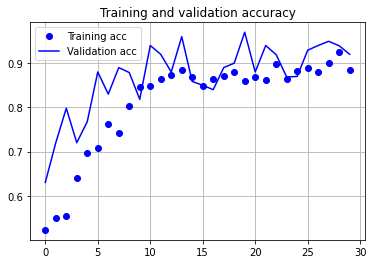

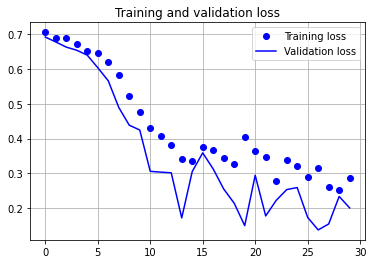

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(axis='both')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(axis='both')
plt.legend()

plt.show()

# Test on test set

In [ ]:
import keras
from keras.models import load_model

test_model = load_model('doing_nails_Inception_try.h5')


In [ ]:
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/test/{classname}/*.mp4'

# Create video frame generator
test = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    shuffle=False,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    use_frame_cache=True)

Total data: 2 classes for 92 files for train


In [ ]:
test_model.evaluate(test)

9/9 [==============================] - 88s 11s/step - loss: 0.2440 - accuracy: 0.9222


[0.24401816725730896, 0.9222221970558167]